<a href="https://colab.research.google.com/github/Mumo-vicky/Hypothyroid-Disease-Prediction/blob/main/Hypothyroid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **Defining The Question**

I have been tasked with looking and detrmining the best model for use in prediction for hypothyroidism. This is on behalf of the Nairobi hospital.

## **Defining Metric For Success**

The goal is to find an accurate model for prediction of the disease presence.

## **Understanding The context**

Hypothyroid is a dangerous disease and the earlier the diagnosis, the better. The Nairobi Hospital has collected data and has tasked me with the work of finding the best model. I am to compare and contrast between several decision trees and various support vector machine kernels and finally determine the best suitable for use in diagnosis.

## **Experimental Design**

The following are the steps I am going to follow:
* Loading and checking data
* Tidying the data
* Data Exploration
* Implementing the solution
* Modelling
* Challenging the solution
* Conclusion

## **Data Relevance**

The data has been collected by the Nairobi hospital and it is relevant to our analysis and prediction-model determination.

# **Data Preparation**

## **Loading Data**

In [67]:
#loading our necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [119]:
#loading our dataset
data = pd.read_csv('http://bit.ly/hypothyroid_data')


## **Checking The data**

In [120]:
#checking the top of our dataset.
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [121]:
#checking the bottom of our dataset.
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [122]:
#checking for the rows and columns
data.shape

(3163, 26)

Our dataset has 3163 rows and 26 columns

In [105]:
#checking for the data types in the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

We can see that the data types for all our columns are objects. We will need to change these to float and categorical data types appropriately.

In [106]:
#seeing the unique variables in the columns
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

Most of the columns seem to have categorical values with the rest being majorly float. We will look deeper into the unique variables for a clearer understanding.

In [107]:
#checking for null values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

As we can see, our data is fairly clean and doesn't have null values.

In [108]:
#checking for duplicate values
data.duplicated().sum()

77

We have 77 duplicated values and we are going to drop these since we are working with a fairly large dataset.

## **Tidying the dataset**

In [123]:
#dropping the duplicated values.
data = data.drop_duplicates()
print(data.duplicated().sum())

0


We can see that the data now has no duplicated values.

In [124]:
#creation of a loop for viewing the unique values.
for column in data.columns:
  print(column)
  print(data[column].unique())
  print()

status
['hypothyroid' 'negative']

age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']

sex
['M' 'F' '?']

on_thyroxine
['f' 't']

query_on_thyroxine
['f' 't']

on_antithyroid_medication
['f' 't']

thyroid_surgery
['f' 't']

query_hypothyroid
['f' 't']

query_hyperthyroid
['f' 't']

pregnant
['f' 't']

sick
['f' 't']

tumor
['f' 't']

lithium
['f' 't']

goitre
['f' 't']

TSH_measured
['y' 'n']

TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '12

We can see that there are values that shouldn't be present. The '?' sign is misplaced and there are several instances of the same. We will convert the sign to a null value and determine whether to drop the values or find a way of dealing with them.

In [125]:
#replacing the '?' sign as a null value.
data.replace('?',np.nan,inplace=True)
data.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

Our TBG column has more than half of the values as null. I will drop these and replace the null values in the other columns using the column mode.

In [126]:
#substituting the null values in the data with the mode values and dropping the TBG column
data = data.drop(columns='TBG')
null_columns = ['age','sex','TSH','T3','TT4','T4U','FTI']
for i in null_columns:
  data[i] = data[i].fillna(data[i].mode()[0])

In [127]:
#checking for the null values.
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

We can see that our null values have been sorted out and our data is now a bit more clean.

In [128]:
#converting the categorical and float columns to their appropriate data types and viewing them.
float_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_columns = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
data[float_columns] = data[float_columns].astype(float)
data[categorical_columns] = data[categorical_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   category
 4   query_on_thyroxine         3086 non-null   category
 5   on_antithyroid_medication  3086 non-null   category
 6   thyroid_surgery            3086 non-null   category
 7   query_hypothyroid          3086 non-null   category
 8   query_hyperthyroid         3086 non-null   category
 9   pregnant                   3086 non-null   category
 10  sick                       3086 non-null   category
 11  tumor                      3086 non-null   category
 12  lithium                    3086 non-null   category
 13  goitre                     3086 n

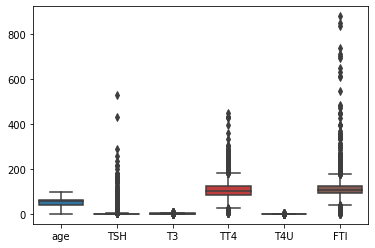

In [129]:
#checking for outliers
colmns = data[float_columns]
plt.figure
ax = sns.boxplot(data = colmns)
plt.show()

Our outliers are evenly distributed within the columns except for two values in the TSH column. We are going to remove them.

In [130]:
#dropping the visible outliers.
c = data[(data['TSH'] > 300)].index
data = data.drop(c) 

In [131]:
#checking for the final size of the dataset.
data.shape

(3084, 25)

Our dataset is now clean and we can proceed to the analysis.

# **Exploratory data Analysis**

We are going to perform univariate, bivariate and multivariate analysis in order for us to get a deeper understanding of the data we have and relations within the columns.

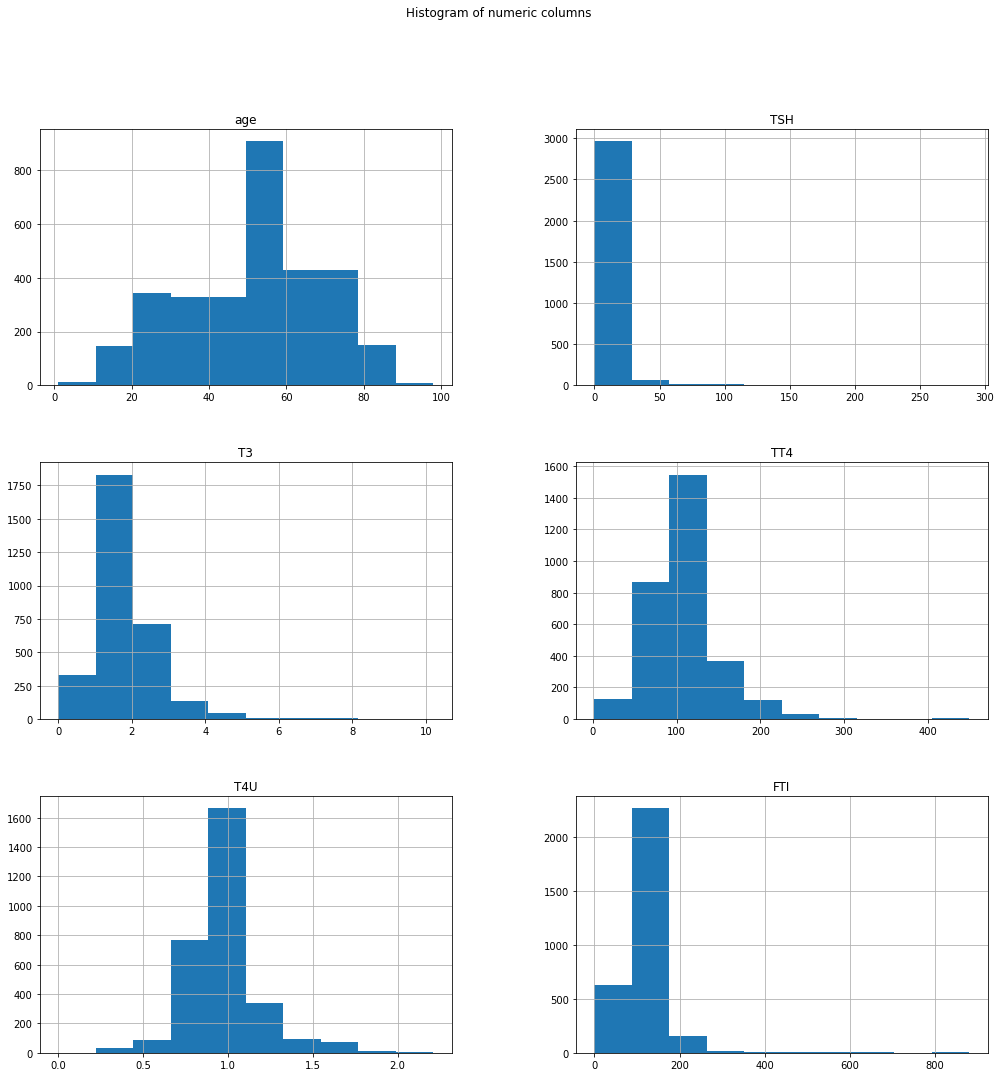

In [132]:
#Plotting the variables on histograms to view their distributions.
data.hist(bins=10, figsize=(17,17))
plt.suptitle("Histogram of numeric columns")
plt.show()

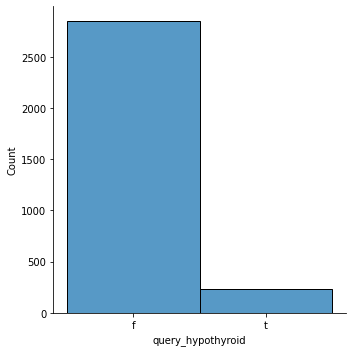

In [133]:
#histogram for hyperthyroid cases
sns.displot(x='query_hypothyroid', data=data)

We can see that most patients who were tested did not the conditions. We can also see that most people were within the age range of 50-60

In [135]:
#viewing the correlations between the columns.
correlation = data.corr()
correlation

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.021343,-0.232597,-0.079862,-0.205503,0.047841
TSH,0.021343,1.000000,-0.180705,-0.325777,0.078925,-0.252136
T3,-0.232597,-0.180705,1.000000,0.521113,0.378320,0.275895
TT4,-0.079862,-0.325777,0.521113,1.000000,0.320726,0.678251
T4U,-0.205503,0.078925,0.378320,0.320726,1.000000,-0.293512
FTI,0.047841,-0.252136,0.275895,0.678251,-0.293512,1.000000


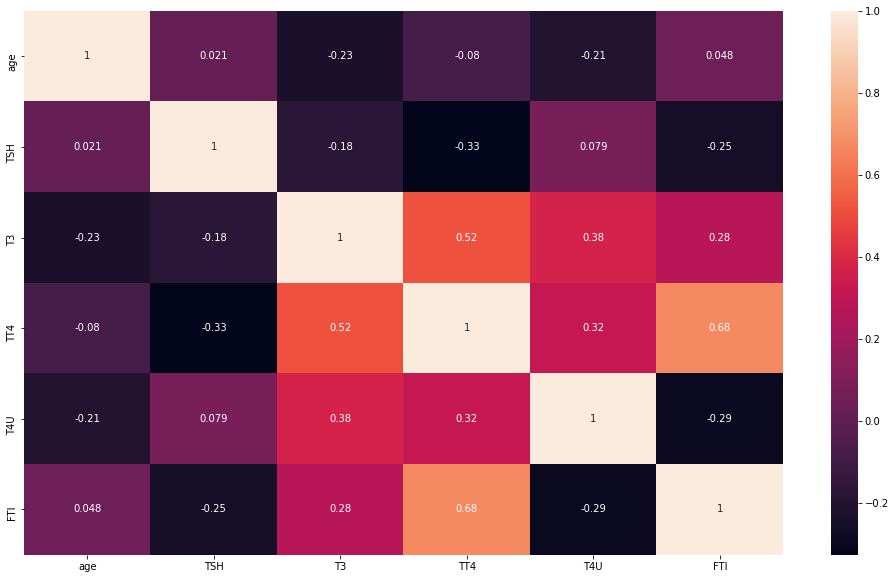

In [137]:
#plotting a better matrix for better visualization
plt.figure(figsize=(17, 10))  
sns.heatmap(correlation, annot = True)

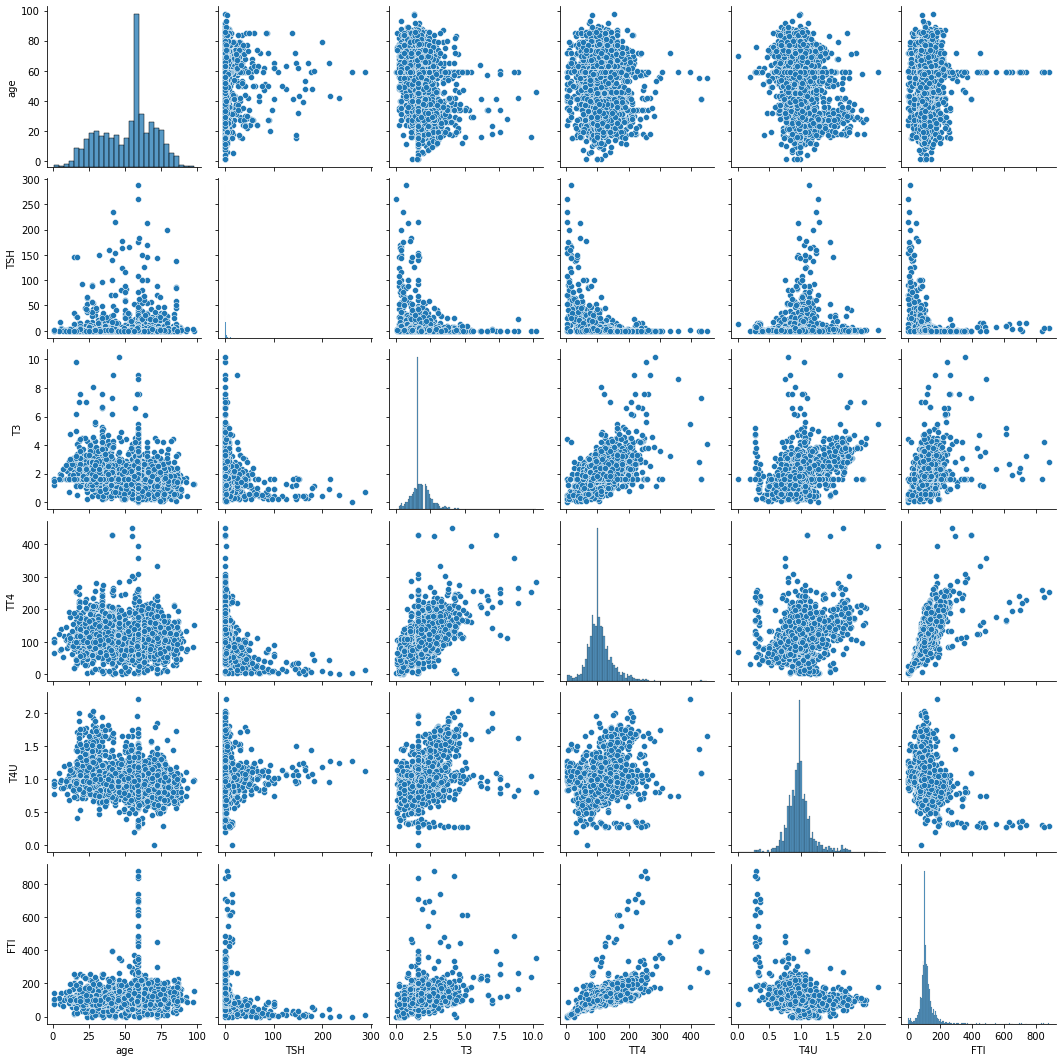

In [138]:
#a pairplot to see the kind of relationships between the variables
sns.pairplot(data)
plt.show()

**Conversion**

In [141]:
#creating two categories for the columns
category_1  = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
category_2 = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']
#loops to convert the columns to numerical values respectively.
for column in category_1:
  data[column] = np.where(data[column] == 'y', 1, 0)

for column in category_2:
  data[column] = np.where(data[column] == 't', 1, 0)

data['sex'] = np.where(data['sex'] == 'M', 1, 0)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
5,hypothyroid,85.0,0,0,0,0,0,1,0,0,0,0,0,0,1,138.0,1,1.1,1,27.0,1,1.19,1,23.0,0


# **Decision trees**

## **Random Forest**

In [142]:
#splitting the dataset.
y = data['status'].values

test_features = data.columns.to_list()
test_features.remove('status')

x = data[test_features].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [143]:
#fitting the model and predicting.
random_forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
random_forest = random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

In [144]:
#getting the accuracy
print('The accuracy score is:', accuracy_score(y_test, y_pred))

The accuracy score is: 0.9821717990275527


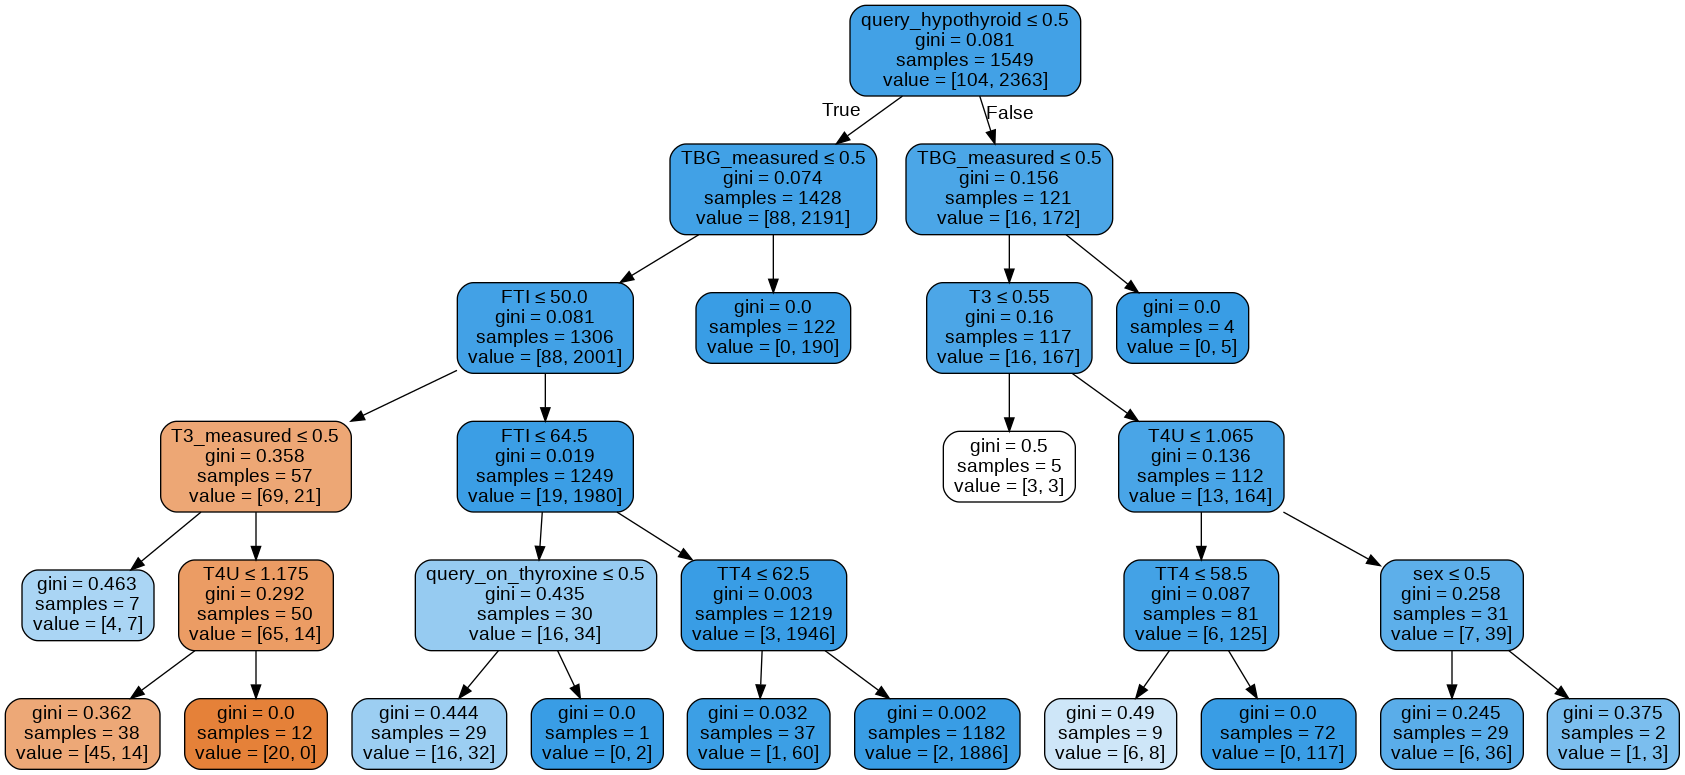

In [145]:
#visualizing the model while it has used 50 trees.
dot_data = StringIO()
tree = random_forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [146]:
#displaying the importances of the columns
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:27} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                         Importance: 0.88
Variable: TT4                         Importance: 0.04
Variable: T3_measured                 Importance: 0.03
Variable: T3                          Importance: 0.02
Variable: T4U                         Importance: 0.02
Variable: query_hypothyroid           Importance: 0.01
Variable: TBG_measured                Importance: 0.01
Variable: age                         Importance: 0.0
Variable: sex                         Importance: 0.0
Variable: on_thyroxine                Importance: 0.0
Variable: query_on_thyroxine          Importance: 0.0
Variable: on_antithyroid_medication   Importance: 0.0
Variable: thyroid_surgery             Importance: 0.0
Variable: query_hyperthyroid          Importance: 0.0
Variable: pregnant                    Importance: 0.0
Variable: sick                        Importance: 0.0
Variable: tumor                       Importance: 0.0
Variable: lithium                     Importance: 0.0
Variable: goitre     

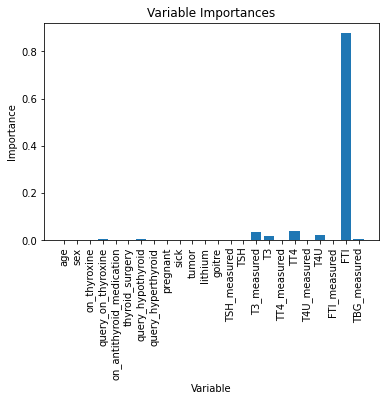

In [147]:
#plotting the importances.
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The accuracy score for the random forest model is 0.9821717990275527 which is good.

## **Ada Boosted Trees**

In [148]:
#splitting the dataset
y1 = data[['status']].values
x1 = data[['FTI']].values

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [149]:
#building the model, fitting it and predicting use the whole dataset.
tree = DecisionTreeClassifier(max_depth=4)
tree = tree.fit(x1_train, y1_train)

y1_pred_tree = tree.predict(x1)

In [150]:
#calculation fo the accuracy
print("Accuracy:",accuracy_score(y1, y1_pred_tree))

Accuracy: 0.9811932555123216


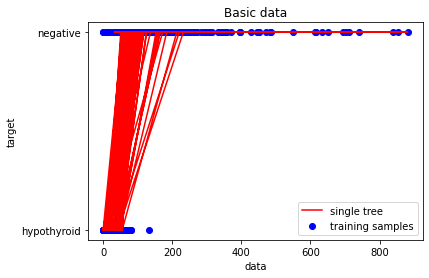

In [151]:
#plotting the base model
plt.figure()
plt.scatter(x1, y1.flatten(), c="b", label="training samples")
plt.plot(x1, y1_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

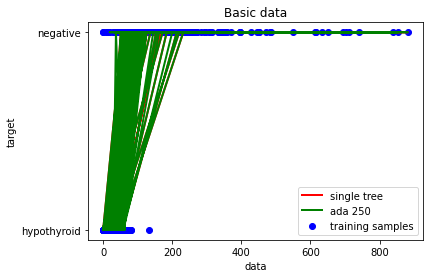

In [153]:
#creating the boosted model
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, random_state=0)
#fitting the model and predicting using the same
ada_boost = ada_boost.fit(x1_train, y1_train)
y1_pred_ada = ada_boost.predict(x1)

#plotting the boosted model against the base model.
plt.figure()
plt.scatter(x1, y1.flatten(), c="b", label="training samples")
plt.plot(x1, y1_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(x1, y1_pred_ada2, c="g", label="ada 250", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [154]:
print("Accuracy:",accuracy_score(y1, y1_pred_ada))

Accuracy: 0.9831387808041504


## **Gradient Boosting**

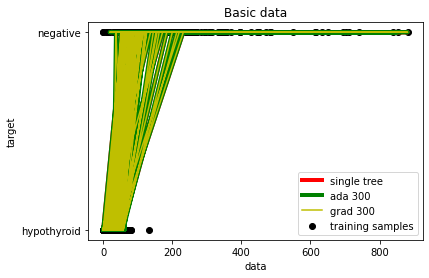

In [155]:
#creating the model for gradient boosting and fitting it.
grad = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=2)
grad = grad.fit(x1_train, y1_train)
#predicting using the whole dataset
y1_pred_grad = grad.predict(x1)
#comparing the three models.
plt.figure()
plt.scatter(x1, y1.flatten(), c="k", label="training samples")
plt.plot(x1, y1_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(x1, y1_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(x1, y1_pred_grad, c="y", label="grad 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [156]:
print("Accuracy:",accuracy_score(y1, y1_pred_grad))

Accuracy: 0.982166018158236


The three models all have an accuracy around 98%. The model with the highest accuracy score is the ada boosted tree and it has a score of 0.9831387808041504, which is 98.3139%.

However from the above plot, gradient boosting seems to have simplified the prediction a bit better than ada boosting.

---



# **Support Vector Machines**

I am not going to further clean the data since I had already done this in the data preparation part. The data is clean enough for use with the SVM models' different kernels.

## **Linear**

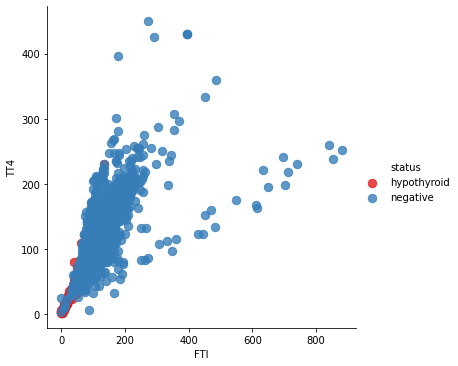

In [157]:
#plotting the variables with the highest importance value
sns.lmplot('FTI', 'TT4', data=data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [159]:
#modifying the status column and splitting the dataset
x3 = data[['FTI', 'TT4']]
y3 = data['status']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 0)

In [160]:
#creating the linear model for use and fitting it
lin_model = SVC(kernel = 'linear')
lin_model.fit(x3_train,y3_train)
#predicting using the linear model.
y3_pred_lin = lin_model.predict(x3_test)

In [166]:
#calculating and displaying the accuracy score and the confusion matrix
print(accuracy_score(y3_test,y3_pred_lin))

print(confusion_matrix(y3_test, y3_pred_lin))

0.9756888168557536
[[ 15  10]
 [  5 587]]


## **Polynomial**

In [ ]:
#creating the polynomial model and fitting it.
poly_model = SVC(kernel='poly',degree=3, gamma='auto')
poly_model.fit(x3_train, y3_train)

In [169]:
#Predicting using the polynomial model.
y3_pred_poly = poly_model.predict(x3_test)
#calculating and displaying the accuracy score and the confusion matrix
print(accuracy_score(y3_test,y3_pred_poly))

print(confusion_matrix(y3_test, y3_pred_poly))

0.9756888168557536
[[ 16   9]
 [  6 586]]


## **Radial Basis Function (Rbf)**

In [164]:
#building and training the model
rbf_model = SVC(kernel='rbf')
rbf_model.fit(x3_train, y3_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [165]:
#Predicting using the polynomial model.
y3_pred_rbf = rbf_model.predict(x3_test)
#calculating and displaying th accuracy score and the confusion matrix
print(accuracy_score(y3_test,y3_pred_rbf))

print(confusion_matrix(y3_test, y3_pred_rbf))

0.9805510534846029
[[ 16   9]
 [  3 589]]


The Three kernels have all performed rather well with scores ranging between 97 and 99. The model with the highest score is the radial basis function and it has a score of 0.9805510534846029, which is 98.0551%.

# **Conclusion**

The following are the scoes for the models.

**Decision trees**
* Random Forest - 0.9821717990275527
* Ada Boost - 0.9831387808041504
* Gradient Boost - 0.982166018158236

**Support Vector Machines**
* Linear - 0.9756888168557536
* Polynomial - 0.9756888168557536
* Radial Basis Function(RBF) - 0.9805510534846029

Overally, all the models performed well with the range of 97-99. The highest performer would be the ada boosted model from the decision trees.

Further optimization can be done using the XGBoost library to see if better results can be obtained.
The data is relevant for our prediction and the models have perfomed well.